In [66]:
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [91]:
df = pd.read_csv('data\joined_data_life.csv', index_col=0)

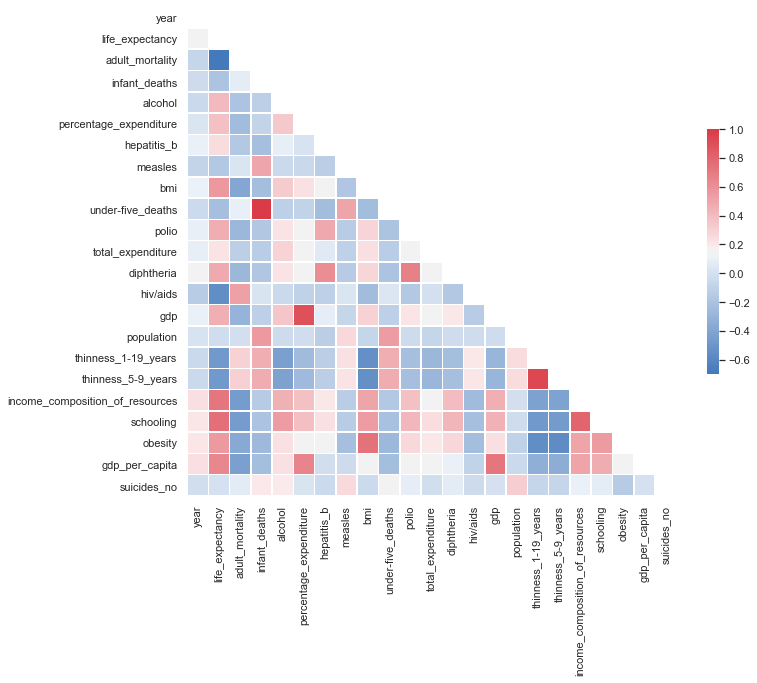

In [68]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

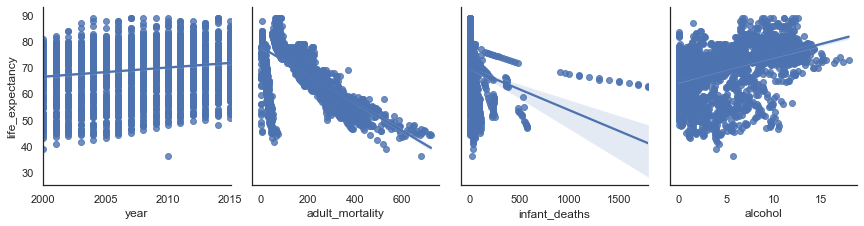

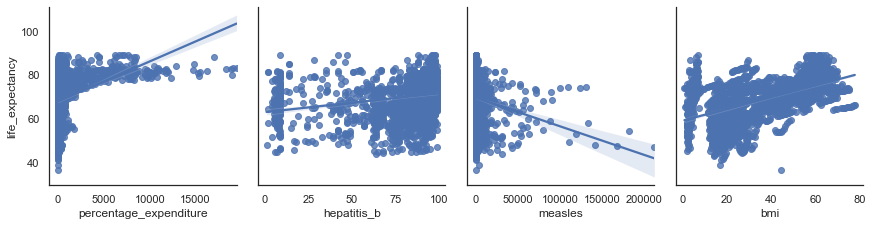

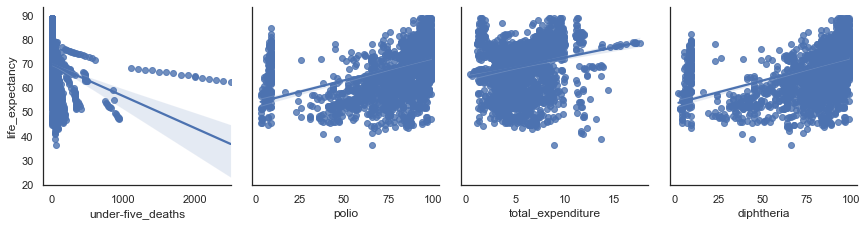

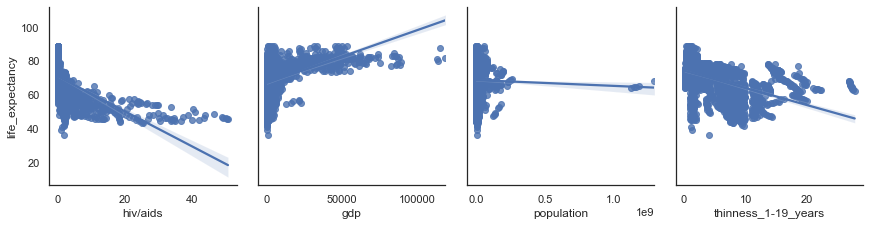

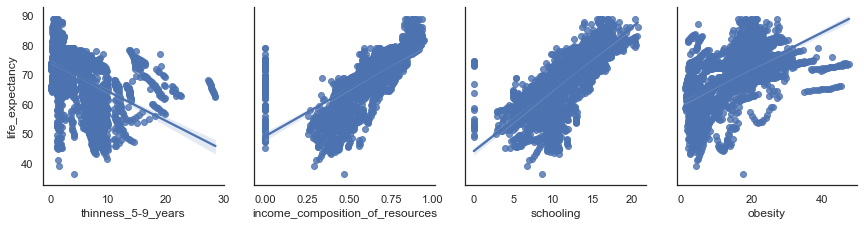

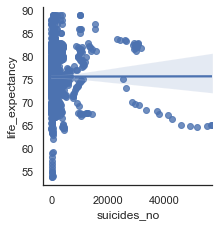

In [4]:
features = ['year', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'obesity', 'suicides_no']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3)

In [5]:
ols('life_expectancy~obesity',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sun, 21 Jun 2020   Prob (F-statistic):          5.41e-213
Time:                        22:42:15   Log-Likelihood:                -8916.2
No. Observations:                2560   AIC:                         1.784e+04
Df Residuals:                    2558   BIC:                         1.785e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0747      0.312    192.494      0.000      59.463      60.687
obesity        0.6067      0.018     34.353      0.000       0.572       0.641
==============================================================================
Omnibus:                       46.430   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.145
Skew:                          -0.315   Prob(JB):                     2.13e-11
Kurtosis:                       3.252   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#Dropping the null values for the features we're using and target
df.dropna(subset=['life_expectancy', 'schooling', 'obesity', 'alcohol', 'income_composition_of_resources', 'diphtheria', 'percentage_expenditure'],inplace=True)

In [70]:
df.isna().sum()

country                               0
year                                  0
status                                0
life_expectancy                       0
adult_mortality                       0
infant_deaths                         0
alcohol                               0
percentage_expenditure                0
hepatitis_b                         458
measles                               0
bmi                                   0
under-five_deaths                     0
polio                                 0
total_expenditure                     6
diphtheria                            0
hiv/aids                              0
gdp                                  93
population                          290
thinness_1-19_years                   0
thinness_5-9_years                    0
income_composition_of_resources       0
schooling                             0
obesity                               0
gdp_per_capita                     1261
suicides_no                        1261


In [8]:
#Dropping the null values for the features we're using and target
df.dropna(subset=['diphtheria'],inplace=True)

In [72]:
ols('life_expectancy~schooling+obesity+alcohol+income_composition_of_resources+percentage_expenditure+diphtheria+status',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     728.4
Date:                Mon, 22 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:40:50   Log-Likelihood:                -7388.1
No. Observations:                2382   AIC:                         1.479e+04
Df Residuals:                    2374   BIC:                         1.484e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          45.2737      0.751     60.274      0.000      43.801      46.747
status[T.Developing]               -3.1705      0.404     -7.844      0.000      -3.963      -2.378
schooling                           1.0058      0.065     15.363      0.000       0.877       1.134
obesity                             0.1798      0.016     11.208      0.000       0.148       0.211
alcohol                            -0.2399      0.036     -6.599      0.000      -0.311      -0.169
income_composition_of_resources    11.8370      0.882     13.417      0.000      10.107      13.567
percentage_expenditure              0.0004   6.07e-05      6.446      0.000       0.000       0.001
diphtheria                          0.0617      0.005     11.767      0.000       0.051       0.072
==============================================================================
Omnibus:                      217.959   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              768.205
Skew:                          -0.419   Prob(JB):                    1.54e-167
Kurtosis:                       5.653   Cond. No.                     1.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
countries_dummy = pd.get_dummies(df.country, prefix='country')
years_dummy = pd.get_dummies(df.year, prefix='year')
status_dummy = pd.get_dummies(df.status, prefix='status')
df = pd.concat([df, countries_dummy, years_dummy, status_dummy], axis=1)

In [94]:
columns = list(df)
cols_country = []
for x in range(0,len(columns)):
    if 'country_' in columns[x]:
        cols_country.append(columns[x])

In [95]:
columns = list(df)
cols_year = []
for x in range(0,len(columns)):
    if 'year_' in columns[x]:
        cols_year.append(columns[x])

In [84]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,obesity,gdp_per_capita,suicides_no,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Bangladesh,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Benin,country_Bhutan,country_Bosnia and Herzegovina,country_Botswana,country_Brazil,country_Brunei Darussalam,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cabo Verde,country_Cambodia,country_Cameroon,country_Canada,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Denmark,country_Djibouti,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Fiji,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,country_Ghana,country_Greece,country_Grenada,country_Guatemala,country_Guinea,country_Guinea-Bissau,country_Guyana,country_Haiti,country_Honduras,country_Hungary,country_Iceland,country_India,country_Indonesia,country_Iraq,country_Ireland,country_Israel,country_Italy,country_Jamaica,country_Japan,country_Jordan,country_Kazakhstan,country_Kenya,country_Kiribati,country_Kuwait,country_Latvia,country_Lebanon,country_Lesotho,country_Liberia,country_Libya,country_Lithuania,country_Luxembourg,country_Madagascar,country_Malawi,country_Malaysia,country_Maldives,country_Mali,country_Malta,country_Mauritania,country_Mauritius,country_Mexico,country_Mongolia,country_Montenegro,country_Morocco,country_Mozambique,country_Myanmar,country_Namibia,country_Nepal,country_Netherlands,country_New Zealand,country_Nicaragua,country_Niger,country_Nigeria,country_Norway,country_Oman,country_Pakistan,country_Panama,country_Papua New Guinea,country_Paraguay,country_Peru,country_Philippines,country_Poland,country_Portugal,country_Qatar,country_Romania,country_Russian Federation,country_Rwanda,country_Samoa,country_Sao Tome and Principe,country_Saudi Arabia,country_Senegal,country_Serbia,country_Seychelles,country_Sierra Leone,country_Singapore,country_Slovenia,country_Solomon Islands,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Switzerland,country_Syrian Arab Republic,country_Tajikistan,country_Thailand,country_Timor-Leste,country_Togo,country_Tonga,country_Trinidad and Tobago,country_Tunisia,country_Turkey,country_Turkmenistan,country_Uganda,country_Ukraine,country_United Arab Emirates,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Yemen,country_Zambia,country_Zimbabwe,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,status_Developed,status_Developing
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,5.2,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,4.9,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Running Model without 'countries' in model

In [14]:
#LOG AND SQUARE ROOT TRANSFORMATIONS to linearize data
df['percentage_expenditure_log'] = df['percentage_expenditure'].map(lambda x: np.log(x))
df['obesity_log'] = df['obesity'].map(lambda x: np.log(x))
df['gdp_log'] = df['gdp'].map(lambda x: np.sqrt(x))
# df['grade_log'] = df['grade'].map(lambda x: np.log(x))

C:\Users\All PC\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [96]:
subsets=[
          'schooling', 'obesity', 'alcohol', 'income_composition_of_resources', 'diphtheria', 'percentage_expenditure', 'status_Developed'
        ]
features = subsets 
#  +cols_country[1:]
df_features = df[features]
target = df['life_expectancy']

In [97]:
len(features)

7

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.20)

In [99]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [100]:
#instantiate a linear regression object
target_std = target.std()
lm = LinearRegression()
#fit the linear regression to the data
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print ("R^2 Score:", lm.score(X_train, y_train))
# print('Mean Absolute Error Z:', test_mae/target_std )

Training Root Mean Squared Error: 5.377863125786538
R^2 Score: 0.6781777134842817


In [101]:
y_pred = lm.predict(X_test)
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print('Root Mean Squared Error Z:' , test_rmse/target_std)

Testing Root Mean Squared Error: 5.3919403727800415
Training:  5 vs. Testing:  5
Root Mean Squared Error Z: 0.5647714598154582


# Running model with 'countries' in model

In [77]:
subsets=[
          'schooling', 'obesity', 'alcohol', 'income_composition_of_resources', 'diphtheria', 'percentage_expenditure', 'status_developed'
        ]
features = subsets +cols_country[1:]
#  +cols_country[1:]
df_features = df[features]
target = df['life_expectancy']

KeyError: "['country_Cambodia', 'country_Armenia', 'country_United Arab Emirates', 'country_Mozambique', 'country_Ghana', 'country_Solomon Islands', 'country_Nicaragua', 'country_Spain', 'country_Tonga', 'country_Belarus', 'country_Uruguay', 'country_Maldives', 'country_Botswana', 'country_Fiji', 'country_Italy', 'country_Bhutan', 'country_Malaysia', 'country_Hungary', 'country_Liberia', 'country_Latvia', 'country_Dominican Republic', 'country_Guyana', 'country_South Africa', 'country_Peru', 'country_Cameroon', 'country_Trinidad and Tobago', 'country_Montenegro', 'country_Malta', 'country_Lesotho', 'country_India', 'country_Lebanon', 'country_Kenya', 'country_Thailand', 'country_Azerbaijan', 'country_Netherlands', 'country_Iraq', 'country_Chile', 'country_Syrian Arab Republic', 'country_Samoa', 'country_Greece', 'country_Togo', 'country_Mauritius', 'country_Jordan', 'country_Albania', 'country_Slovenia', 'country_Singapore', 'country_Denmark', 'country_Madagascar', 'country_Angola', 'country_Chad', 'country_Sri Lanka', 'country_Finland', 'country_Costa Rica', 'country_Canada', 'country_Haiti', 'country_Russian Federation', 'country_Mongolia', 'country_Timor-Leste', 'country_Norway', 'country_Bangladesh', 'country_Niger', 'country_Lithuania', 'country_Comoros', 'country_Honduras', 'country_Libya', 'country_Turkmenistan', 'country_Cyprus', 'country_Mali', 'country_Benin', 'country_China', 'country_Paraguay', 'country_Brunei Darussalam', 'country_Indonesia', 'country_Bulgaria', 'country_New Zealand', 'country_Seychelles', 'country_Luxembourg', 'country_Vanuatu', 'country_Bahrain', 'country_Belize', 'country_Ireland', 'country_Bahamas', 'country_El Salvador', 'country_Colombia', 'country_Oman', 'country_Israel', 'country_Japan', 'country_Equatorial Guinea', 'country_Brazil', 'country_Central African Republic', 'country_Guatemala', 'country_Serbia', 'country_Panama', 'country_Philippines', 'country_Guinea', 'country_Tunisia', 'country_Kiribati', 'country_Suriname', 'country_France', 'country_Egypt', 'country_Jamaica', 'country_Turkey', 'country_Malawi', 'country_Argentina', 'country_Sierra Leone', 'country_Romania', 'country_Croatia', 'country_Grenada', 'country_Congo', 'country_Papua New Guinea', 'country_Nigeria', 'country_Sweden', 'country_Ethiopia', 'country_Djibouti', 'country_Pakistan', 'country_Myanmar', 'country_Barbados', 'country_Cabo Verde', 'status_developed', 'country_Austria', 'country_Bosnia and Herzegovina', 'country_Gabon', 'country_Germany', 'country_Belgium', 'country_Yemen', 'country_Sao Tome and Principe', 'country_Zambia', 'country_Cuba', 'country_Australia', 'country_Zimbabwe', 'country_Burkina Faso', 'country_Namibia', 'country_Switzerland', 'country_Nepal', 'country_Rwanda', 'country_Qatar', 'country_Senegal', 'country_Morocco', 'country_Poland', 'country_Georgia', 'country_Guinea-Bissau', 'country_Ecuador', 'country_Mexico', 'country_Tajikistan', 'country_Mauritania', 'country_Ukraine', 'country_Kazakhstan', 'country_Portugal', 'country_Uganda', 'country_Antigua and Barbuda', 'country_Algeria', 'country_Kuwait', 'country_Saudi Arabia', 'country_Uzbekistan', 'country_Gambia', 'country_Estonia', 'country_Iceland', 'country_Burundi', 'country_Eritrea'] not in index"

In [22]:
len(features)

164

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=34,test_size=0.20)

In [24]:
scaler = StandardScaler()

# fit the scaler to the training data
scaler.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [25]:
#instantiate a linear regression object
target_std = target.std()
lm = LinearRegression()
#fit the linear regression to the data
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)
print ("R^2 Score:", lm.score(X_train, y_train))
# print('Mean Absolute Error Z:', test_mae/target_std )

Training Root Mean Squared Error: 2.091471422794038
R^2 Score: 0.9513256123373109


In [26]:
y_pred = lm.predict(X_test)
#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Testing Root Mean Squared Error:' , test_rmse)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
target_std = target.std()
print('Root Mean Squared Error Z:' , test_rmse/target_std)

Testing Root Mean Squared Error: 2.427264471377568
Training:  2 vs. Testing:  2
Root Mean Squared Error Z: 0.2542405153028995


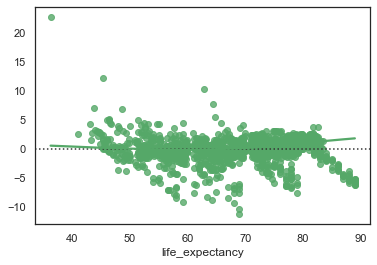

In [27]:
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

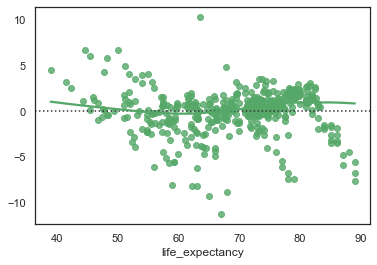

In [28]:
sns.residplot( y_test, y_pred, lowess=True, color="g")

# F Test

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k='all')

selector.fit(X_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000002A5C0C2F048>)

In [54]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [55]:
len(selected_columns)

164

In [56]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)
print('Root Mean Squared Error Z:' , test_rmse/target_std)
print ("R^2 Score:", lm_kbest.score(X_train, y_train))

Training Root Mean Squared Error: 2.091471422794038
Testing Root Mean Squared Error: 2.427264471377568
Original:  2.8008527040293343 vs. KBest:  2.427264471377568
Root Mean Squared Error Z: 0.29337150654860367
R^2 Score: 0.9513256123373109


# Recursive Feature Elimination

In [33]:
from sklearn.feature_selection import RFECV

In [34]:
ols = linear_model.LinearRegression()

In [35]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=10, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=10,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [36]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]


In [37]:
len(list(selected_rfe))

164

In [38]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 2.091471422794038
Testing Root Mean Squared Error: 2.427264471377568
Original:  2.427264471377568 vs. KBest:  2.427264471377568 vs. RFE:  2.427264471377568


# Lasso

In [52]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


print ("R^2 Score:", lasso.score(X_train, y_train))
print('Root Mean Squared Error Z:' , test_rmse/target_std)

Training Error: 1.8052956839002816
Testing Error: 2.8008527040293343
R^2 Score: 0.9260878918619333
Root Mean Squared Error Z: 0.29337150654860367


In [51]:
len(lasso_coef01.columns)

164

In [48]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )

print ("R^2 Score:", lasso1.score(X_train, y_train))

Training Error: 1.8052956839002816
Testing Error: 2.8008527040293343
R^2 Score: 0.9260878918619333


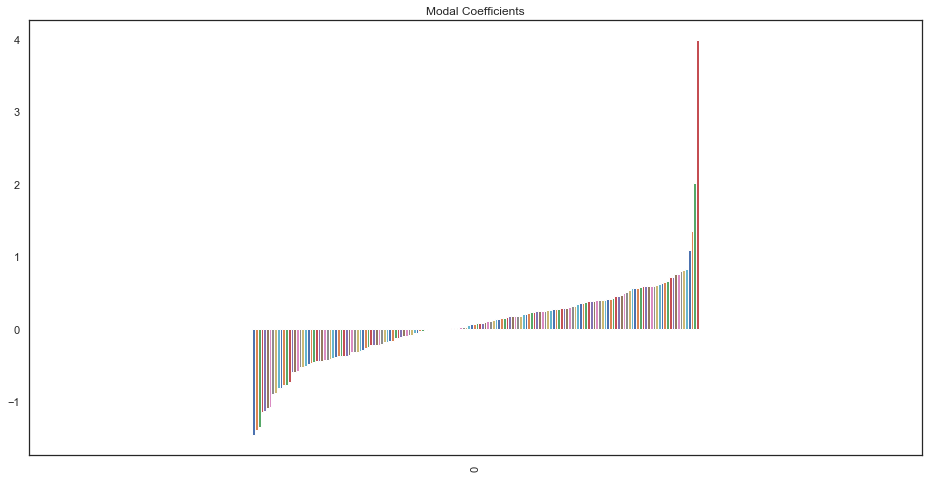

In [43]:
lasso_coef02 = pd.DataFrame(data=lasso1.coef_).T
lasso_coef02.columns = X_train.columns
lasso_coef02 = lasso_coef01.T.sort_values(by=0).T
lasso_coef02.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [44]:
lasso_coef02.columns

Index(['country_Zimbabwe', 'country_Lesotho', 'country_South Africa',
       'country_Botswana', 'country_Sierra Leone', 'country_Malawi',
       'country_Kiribati', 'country_Angola',
       'country_Central African Republic', 'country_Cameroon',
       ...
       'country_Italy', 'country_France', 'country_Switzerland',
       'country_Sweden', 'country_Maldives', 'country_China',
       'country_Singapore', 'country_Japan', 'schooling', 'obesity'],
      dtype='object', length=164)

Running all of the models it looks like our 